In [1]:
import warnings
warnings.filterwarnings('ignore')

## Методы обучения без учителя. Кластеризация


Рассмотрим синтетический пример групп точек. Зрительная система человека легко выделяет группы точек, расположенных близко друг к другу.

Как реализовать данный алгоритм для решения этой задачи машиной?

Для чего это нужно? Как уже говорилось ранее (лекция 5), каждый объект в конечном итоге представляется набором числовых свойств, представляющих собой точку в пространстве признаков. Очевидно, похожие объекты будут находиться рядом друг с другом ввиду близости свойств, формируя компактные множества (гипотеза компактности). 

Данная задача актуальна в случае, когда не задана принадлежность объектов каким-либо классам, либо решается задача анализа свойств объектов, в которой информация о принадлежности классам не требуется. 

Решение задачи выделения таких групп объектов - **кластеров** - позволяет находить и исследовать их общие свойства, формировать какие-либо предположения и гипотезы.  


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from  matplotlib.colors import ListedColormap

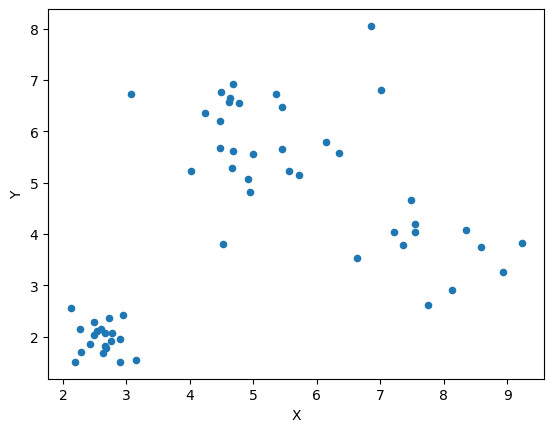

In [3]:
np.random.seed(13)
#первая кучка вокруг точки (2.5, 2)
x1 = np.random.normal(2.5, 0.3, 20)
y1 = np.random.normal(2.0, 0.3, 20)
dat = pd.DataFrame({"X": x1, "Y": y1, "class": 1})

#вторая кучка вокруг точки (5, 6)
x2 = np.random.normal(5.0, 1.0, 25)
y2 = np.random.normal(6.0, 1.0, 25)
add = pd.DataFrame({"X": x2, "Y": y2, "class": 2})
dat = pd.concat([dat, add], ignore_index = True)

#третья кучка вокруг точки (8, 4)
x3 = np.random.normal(8.0, .7, 12)
y3 = np.random.normal(4.0, .6, 12)
add = pd.DataFrame({"X": x3, "Y": y3, "class": 3})
dat = pd.concat([dat, add], ignore_index = True)

#dat.plot.scatter(x="X", y="Y", c="class", cmap = ListedColormap(["red", "green","blue"]))
dat.plot.scatter(x="X", y="Y")
plt.show()


**Кластеризация** - это задача машинного обучения, которая заключается в разделении набора данных на группы (кластеры) объектов, которые имеют схожие характеристики или свойства. Алгоритмы кластеризации предлагают различные методы для выполнения этой задачи. Наиболее распространенные из них:

* K-средних (K-means): Это один из самых популярных алгоритмов кластеризации. Он разбивает набор данных на K кластеров, где K - заданное число. Алгоритм начинает с инициализации K центроидов (представляющих центры кластеров) случайным образом. Затем он выполняет итеративный процесс, перемещая центроиды и перераспределяя объекты между кластерами до сходимости.


* DBSCAN (Density-Based Spatial Clustering of Applications with Noise): Этот алгоритм основан на плотности данных. Он определяет кластеры, исходя из плотности объектов в пространстве. Алгоритм идентифицирует основные объекты (точки с высокой плотностью) и расширяет кластеры от них, исключая шумовые объекты (точки с низкой плотностью).


* Иерархическая кластеризация: Этот алгоритм строит иерархию кластеров, представленную в виде дерева (дендрограммы). Он может быть агломеративным или дивизивным. Агломеративная иерархическая кластеризация начинается с каждого объекта в отдельном кластере и объединяет близкие кластеры, пока не будет получено окончательное разбиение. Дивизивная иерархическая кластеризация начинается с одного кластера, который разделяется на более мелкие кластеры до достижения желаемого числа.


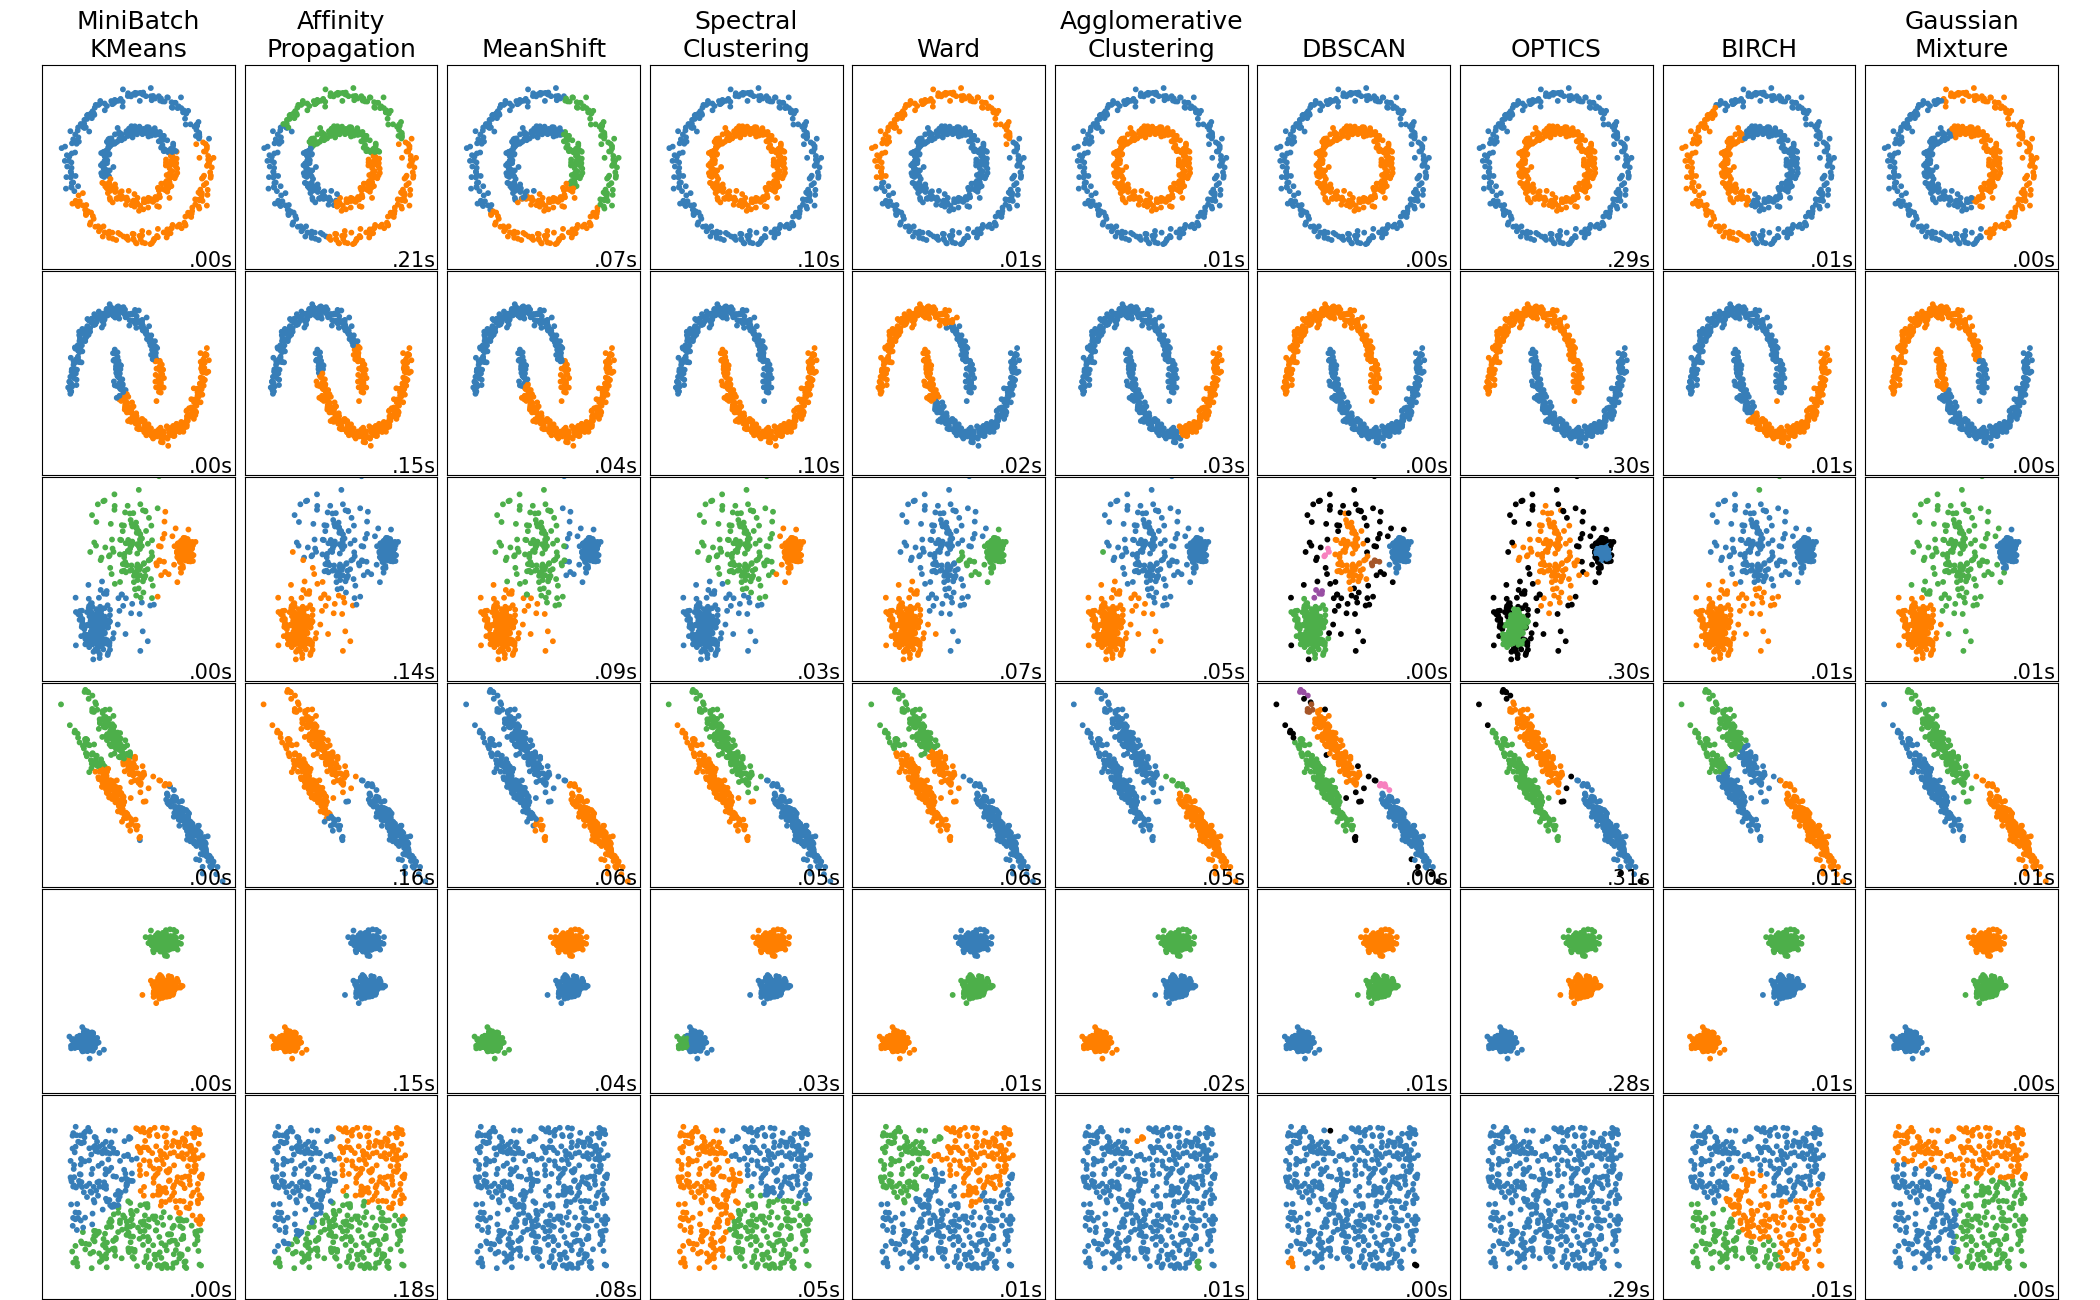

Картинка взята с https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html

<hr>

Для наглядности и простоты интерпретации работы методов используем известный набор данных с ирисами Фишера (хотя для кластеризации наличие классификации не нужно, однако она позволяет сравнить результат работы машинного выделения групп по их свйствам с естественной)

In [4]:
from sklearn.datasets import load_iris

data = load_iris()

### Метод К средних (K-Means)

Алгоритм основан на объединении точек по критерию близости к специально выбираемым точкам - т.н. **центроидам**.

1. Первым шагом некоторым образом (часто случайным) выбираются *K* таких точек (собственно, по количеству *K* будущих кластеров).

2. Далее вычисляются расстояния (обычно евклидово рассотяние) от каждой точки до каждого центроида и выбирается наименьшее из этих расстояний - т.е. смотрим, к какому из центроидов точка ближе. К какому центроиду ближе, к тому кластеру данная точка и будет относиться. Составляются списки точек, входящих в каждый из кластеров.

3. Для каждого кластера вычисляются центроиды: среднее арифметическое координат входящих в него точек. 

4. Далее необходимо сформировать кластеры в соответствии с новыми центроидами, поэтму снова выполняется процедура, описанная на шаге 2.

5. Полученные списки точек в каждом кластере небходимо сравнить со списками точек предыдущей итерации. Если они не отличаются (если никакая точка не поменяла свою принадлежность, т.е. составы кластеров остались прежними), то алгоритм останавливается.

Как видно, алгоритм представляет собой циклическую процедуру. 

Иллюстрация работы алгоритма на точках из примера выше с формированием трех кластеров (*K* = 3)


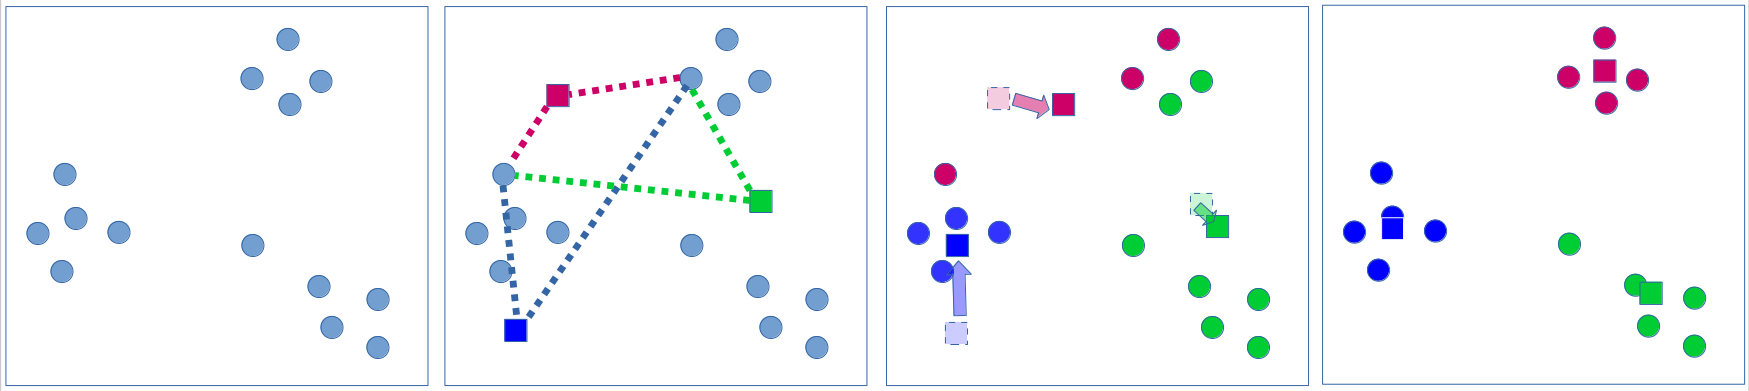


### Метод KMeans из бибилиотеки scikit-learn

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

Объект **KMeans** из библиотеки **scikit-learn** реализует функции метода К-средних. Конструктор объекта принимает следующие параметры:

* **n_clusters: int, default = 8** - Кол-во кластеров, которое будет сформировано (сколько центроидов сгенерировать)

* **init: {‘k-means++’, ‘random’}, функция или массив формы (n_clusters, n_features), default = ’k-means++’** - 
метод начальной инициализации алгоритма:
    * ‘k-means++’ : "умная" генерация начальных значений центроидов на основе эмпирического распределения данных.
    * ‘random’: случайный выбор **n_clusters** точек из исходных данных.
    * если подается массив начальных центроидов, то он должен быть формы *(n_clusters, n_features)* 
    * если подается функция, то она должна принимать аргументы X, n_clusters и параметр случайного генератора, а возвращать инициализирующие значения

* **n_init: ‘auto’ or int, default = 10** - Количество итераций, которые алгоритм выволняется с различными начальными случайными генераторами центроидов. Финальным результатом является вариант с наилучшим полцчившимся параметром инерции (средний квадрат расстояний между точками кластера).

* **max_iter: int, default = 300** - Ограничение на максимальное количество итераций алгоритма в рамках одного запуска.


* **verbose: int, default = 0** - Выводить лог (если не 0)

* **random_state: int**, - параметр случайного генератора


* **algorithm: {“lloyd”, “elkan”, “auto”, “full”}, default=”lloyd”** - выбор конкретного алгоритма реализации метода 

In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

X = data.data

# создаем сам объект KMeans с количеством кластеров равным 3 (default=8
# остальные параметры приняты по умолчанию
kmeans = KMeans( n_clusters = 3, random_state = 2 )

# Производим кластеризацию данных
kmeans.fit( X )

# метки кластеров для каждого объекта
labels = kmeans.labels_

# координаты центроидов
centroids = kmeans.cluster_centers_

print("Метки кластеров:")
print(labels)
print("Фактические метки классов:")
print(data.target)

print("Координаты центроидов:")
print(centroids)

print(f"Точность совпадения меток: {accuracy_score(data.target, labels)}" )

Метки кластеров:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
Фактические метки классов:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Координаты центроидов:
[[5.006      3.428      1.462      0.246     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]
 [6.85       3.07368421 5.74210526 2.07105263]]
Точность совпадения меток: 0.8933333333333333


Ниже визуализируем сечения пространства признаков для сравнения существующей классификации и выполненной машиной кластеризацией - разбиение объектов по результатам анализа их свойств. 

Слева - имеющаяся классификация. Справа - результат кластеризации с нанесенными центроидами кластеров (в форме звезды)

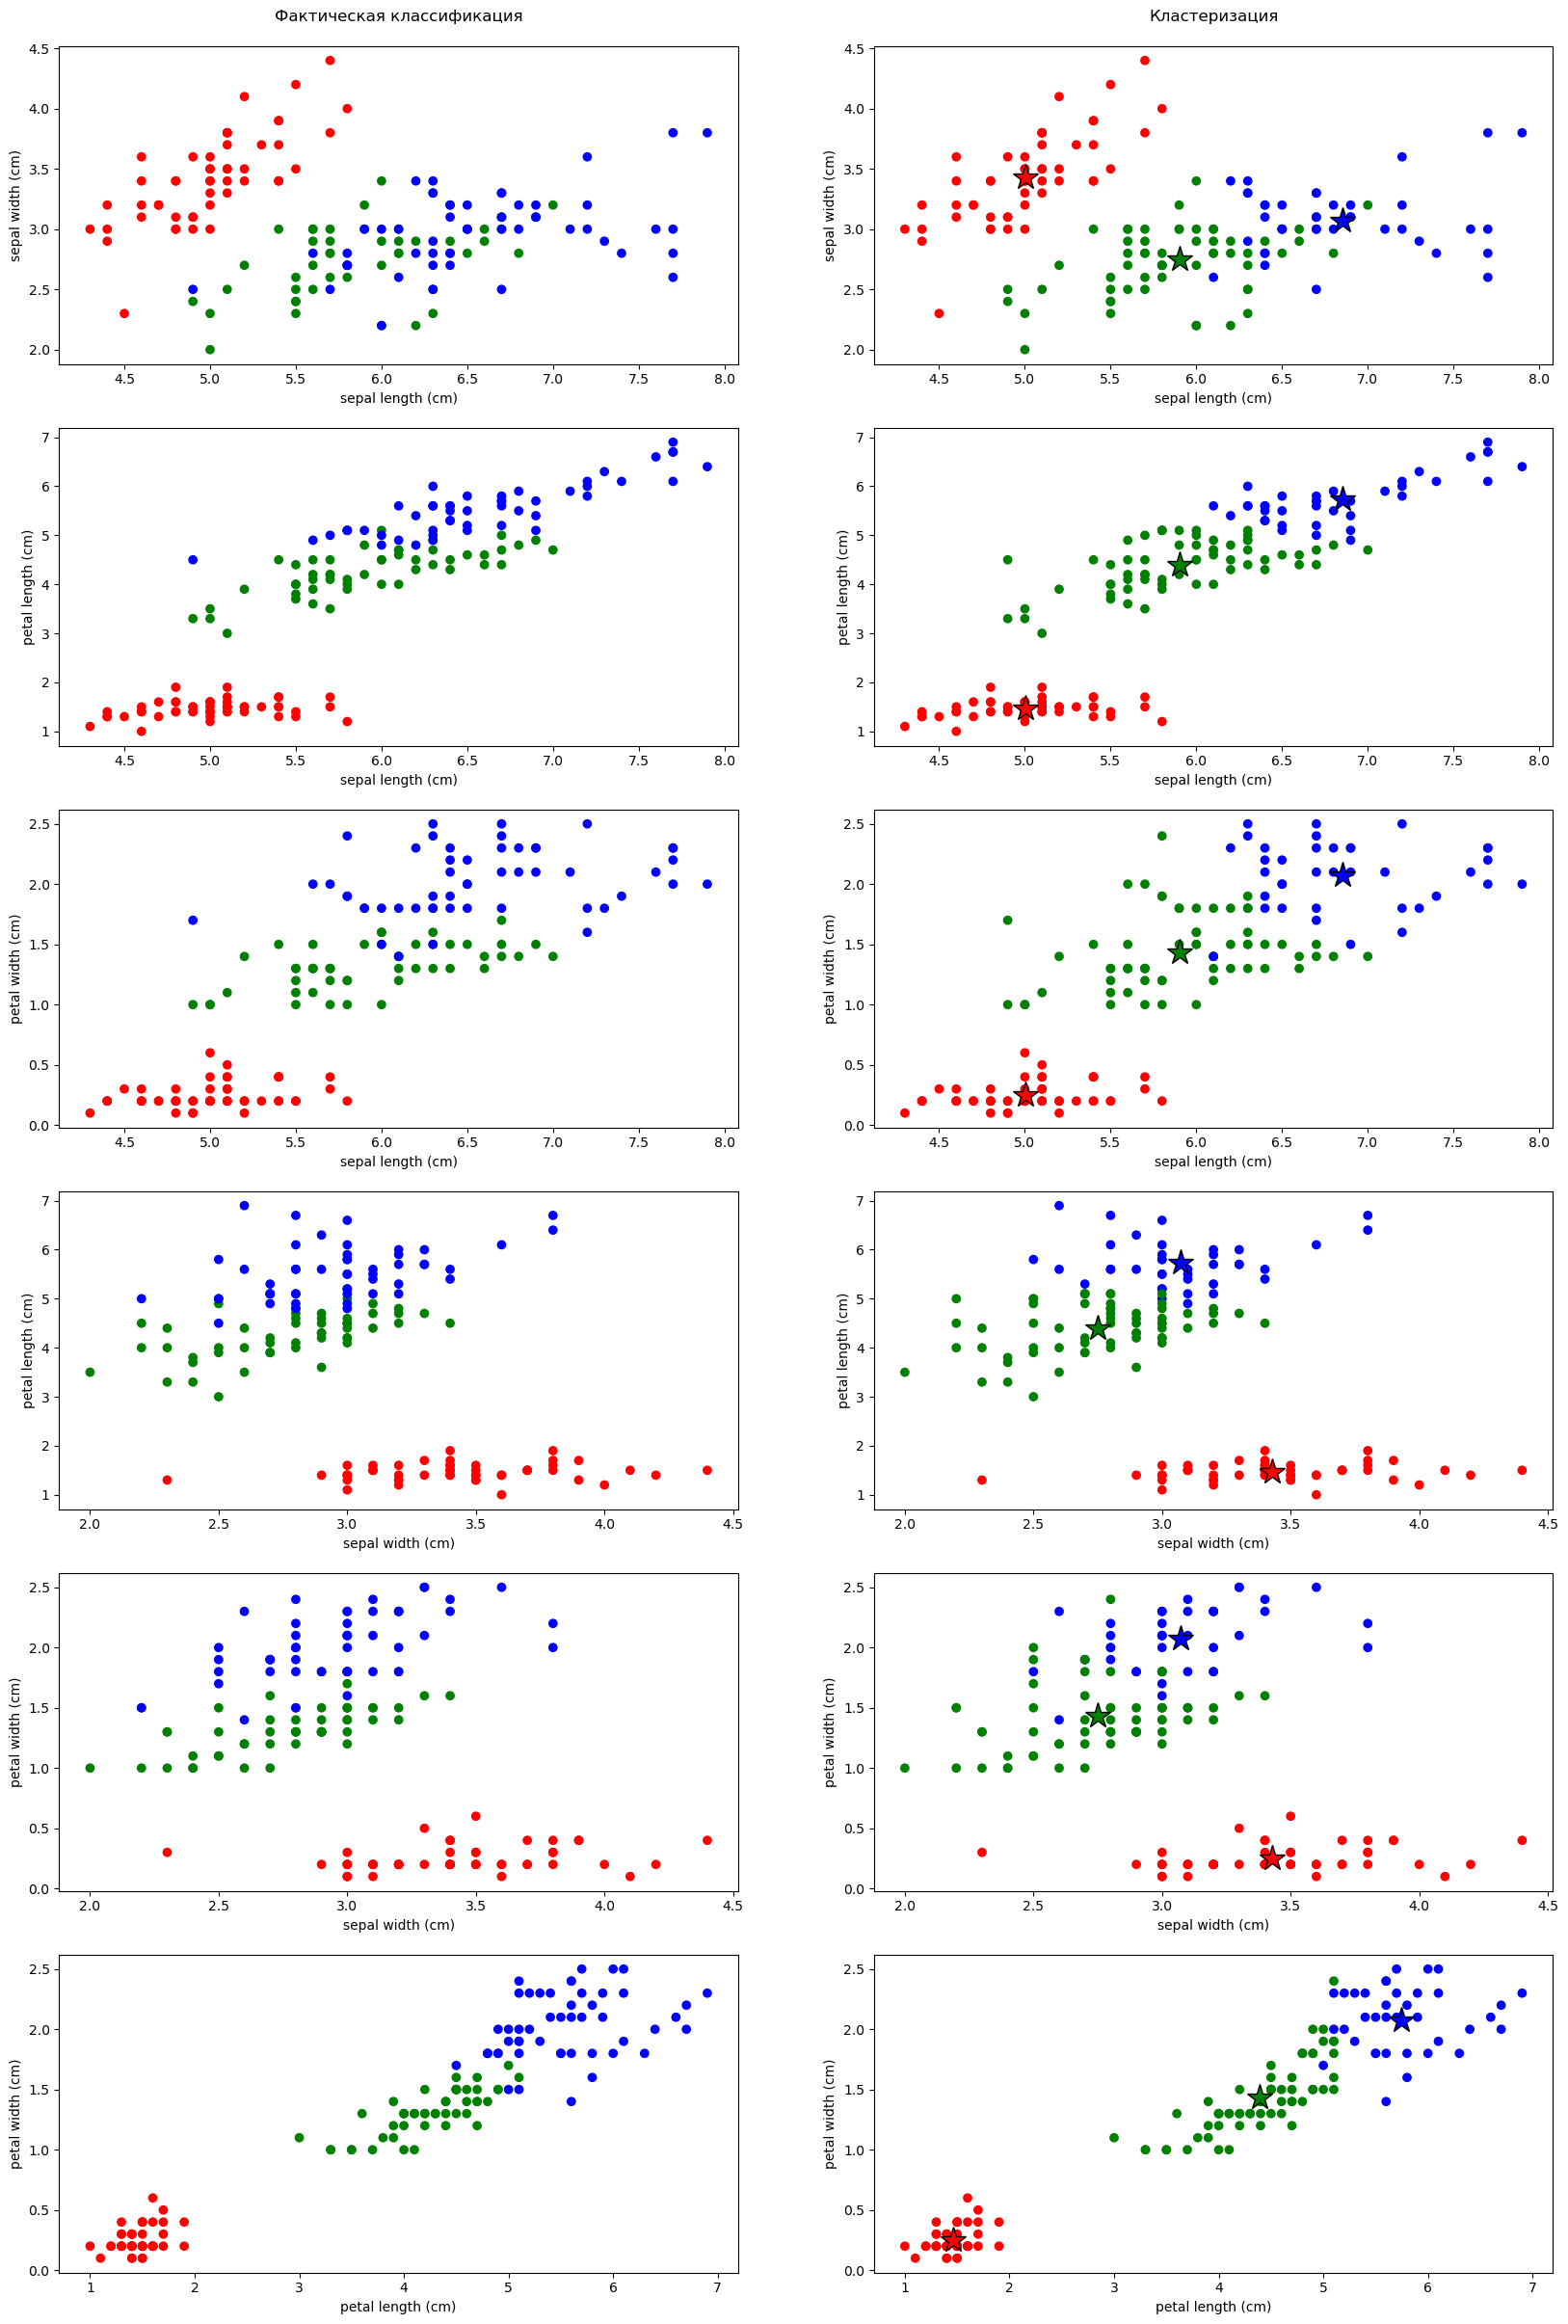

In [6]:
colorMap = ListedColormap(["red", "green","blue"])

fig, axs = plt.subplots(6,2, figsize = (20,30))

#слева график фактической классификации по параметрам 0 и 1
axs[0,0].scatter(X[:,0], X[:,1], c = data.target, cmap = colorMap )
axs[0,0].set_xlabel(data.feature_names[0])
axs[0,0].set_ylabel(data.feature_names[1])
axs[0,0].set_title("Фактическая классификация\n")

#справа - график с кластеризацией данных по параметрам 0 и 1
axs[0,1].scatter(X[:,0], X[:,1], c = labels, cmap = colorMap )
#отображаем центроиды по свойствам 0 и 1
axs[0,1].plot(centroids[0,0], centroids[0,1], color = colorMap.colors[0], marker = "*", markersize = 20, markeredgecolor = "k")
axs[0,1].plot(centroids[1,0], centroids[1,1], color = colorMap.colors[1], marker = "*", markersize = 20, markeredgecolor = "k")
axs[0,1].plot(centroids[2,0], centroids[2,1], color = colorMap.colors[2], marker = "*", markersize = 20, markeredgecolor = "k")
axs[0,1].set_xlabel(data.feature_names[0])
axs[0,1].set_ylabel(data.feature_names[1])
axs[0,1].set_title("Кластеризация\n")

# классификация по параметрам 0 , 2
axs[1,0].scatter(X[:,0], X[:,2], c = data.target, cmap = colorMap )
axs[1,0].set_xlabel(data.feature_names[0])
axs[1,0].set_ylabel(data.feature_names[2])

# кластеризация. параметры 0, 2 
axs[1,1].scatter(X[:,0], X[:,2], c = labels, cmap = colorMap )
axs[1,1].plot(centroids[0,0], centroids[0,2], color = colorMap.colors[0], marker = "*", markersize = 20, markeredgecolor = "k")
axs[1,1].plot(centroids[1,0], centroids[1,2], color = colorMap.colors[1], marker = "*", markersize = 20, markeredgecolor = "k")
axs[1,1].plot(centroids[2,0], centroids[2,2], color = colorMap.colors[2], marker = "*", markersize = 20, markeredgecolor = "k")
axs[1,1].set_xlabel(data.feature_names[0])
axs[1,1].set_ylabel(data.feature_names[2])

# классификация по параметрам 0 , 3
axs[2,0].scatter(X[:,0], X[:,3], c = data.target, cmap = colorMap )
axs[2,0].set_xlabel(data.feature_names[0])
axs[2,0].set_ylabel(data.feature_names[3])

# кластеризация. параметры 0, 3
axs[2,1].scatter(X[:,0], X[:,3], c = labels, cmap = colorMap )
axs[2,1].plot(centroids[0,0], centroids[0,3], color = colorMap.colors[0], marker = "*", markersize = 20, markeredgecolor = "k")
axs[2,1].plot(centroids[1,0], centroids[1,3], color = colorMap.colors[1], marker = "*", markersize = 20, markeredgecolor = "k")
axs[2,1].plot(centroids[2,0], centroids[2,3], color = colorMap.colors[2], marker = "*", markersize = 20, markeredgecolor = "k")
axs[2,1].set_xlabel(data.feature_names[0])
axs[2,1].set_ylabel(data.feature_names[3])

# классификация по параметрам 1 , 2
axs[3,0].scatter(X[:,1], X[:,2], c = data.target, cmap = colorMap )
axs[3,0].set_xlabel(data.feature_names[1])
axs[3,0].set_ylabel(data.feature_names[2])

# кластеризация. параметры 1, 2 
axs[3,1].scatter(X[:,1], X[:,2], c = labels, cmap = colorMap )
axs[3,1].plot(centroids[0,1], centroids[0,2], color = colorMap.colors[0], marker = "*", markersize = 20, markeredgecolor = "k")
axs[3,1].plot(centroids[1,1], centroids[1,2], color = colorMap.colors[1], marker = "*", markersize = 20, markeredgecolor = "k")
axs[3,1].plot(centroids[2,1], centroids[2,2], color = colorMap.colors[2], marker = "*", markersize = 20, markeredgecolor = "k")
axs[3,1].set_xlabel(data.feature_names[1])
axs[3,1].set_ylabel(data.feature_names[2])

# классификация по параметрам 1 , 3
axs[4,0].scatter(X[:,1], X[:,3], c = data.target, cmap = colorMap )
axs[4,0].set_xlabel(data.feature_names[1])
axs[4,0].set_ylabel(data.feature_names[3])

# кластеризация. параметры 1, 3 
axs[4,1].scatter(X[:,1], X[:,3], c = labels, cmap = colorMap )
axs[4,1].plot(centroids[0,1], centroids[0,3], color = colorMap.colors[0], marker = "*", markersize = 20, markeredgecolor = "k")
axs[4,1].plot(centroids[1,1], centroids[1,3], color = colorMap.colors[1], marker = "*", markersize = 20, markeredgecolor = "k")
axs[4,1].plot(centroids[2,1], centroids[2,3], color = colorMap.colors[2], marker = "*", markersize = 20, markeredgecolor = "k")
axs[4,1].set_xlabel(data.feature_names[1])
axs[4,1].set_ylabel(data.feature_names[3])

# классификация по параметрам 2 , 3
axs[5,0].scatter(X[:,2], X[:,3], c = data.target, cmap = colorMap )
axs[5,0].set_xlabel(data.feature_names[2])
axs[5,0].set_ylabel(data.feature_names[3])

# кластеризация. параметры 2, 3
axs[5,1].scatter(X[:,2], X[:,3], c = labels, cmap = colorMap )
axs[5,1].plot(centroids[0,2], centroids[0,3], color = colorMap.colors[0], marker = "*", markersize = 20, markeredgecolor = "k")
axs[5,1].plot(centroids[1,2], centroids[1,3], color = colorMap.colors[1], marker = "*", markersize = 20, markeredgecolor = "k")
axs[5,1].plot(centroids[2,2], centroids[2,3], color = colorMap.colors[2], marker = "*", markersize = 20, markeredgecolor = "k")
axs[5,1].set_xlabel(data.feature_names[2])
axs[5,1].set_ylabel(data.feature_names[3])


plt.show()

<font color = "red"><b>Важно понимать!</b></font>

Задача кластеризации принципиально отличается от задачи классификации тем, что для задачи кластеризации не указывается разбиение объектов на классы. Алгоритм кластеризации сам проводит разбиение объектов или наблюдений на группы на основе их свойств.

В задаче с ирисами Фишера было известно количество классов и метки, что позволило сравнить машинную "классификацию" с естественной. При этом алгоритм кластеризации может верно выделить группу объектов, но значения номеров кластеров от меток могут отличаться, что для задачи кластеризации ошибкой не является, однако применение метрики *accuracy_score* в этом случае выявит несоответствие и учтет как ошибку.

В общем случае, количество кластеров a-priori неизвестно и сравнивать качество такой классификации не с чем. Однако существуют метрики качества кластеризации. 

Для случая, когда известны истинные метки классов, существует метрика **Adjusted Rand Index (ARI)**

При оценке качества кластеризации используются различные метрики, которые позволяют оценить сходство между кластерами и их компактность. Вот некоторые распространенные метрики кластеризации:


* Индекс силуэта (Silhouette Score): Метрика, которая оценивает сходство объектов внутри своего кластера и различие между кластерами. Значение индекса силуэта находится в диапазоне от -1 до 1, где высокое значение указывает на хорошую кластеризацию.

* Коэффициент Дэвиcа-Болдуина (Davies-Bouldin Index): Метрика, которая оценивает сходство и различие между кластерами, учитывая их компактность и разделение. Низкое значение коэффициента Дэвиcа-Болдуина указывает на хорошую кластеризацию.

* Показатель согласования Rand (Rand Index): Метрика, которая оценивает сходство между исходными метками и метками, полученными после кластеризации. Значение показателя Rand находится в диапазоне от 0 до 1, где высокое значение указывает на хорошую кластеризацию.


### Оценка метрик кластеризации:

В Python существует несколько библиотек, которые предоставляют средства для оценки метрик кластеризации. Некоторые из наиболее популярных библиотек включают:

* scikit-learn: Библиотека scikit-learn предоставляет множество метрик кластеризации в модуле **sklearn.metrics**. Некоторые из них включают **silhouette_score**, **davies_bouldin_score**, **adjusted_rand_score**, и другие.

* scipy: Библиотека scipy также предлагает некоторые метрики кластеризации в модуле **scipy.cluster.hierarchy**. Например, функция **cophenet** может использоваться для оценки качества иерархической кластеризации.

In [7]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import adjusted_rand_score

# X - данные
# labels - метки кластеров
silhouette_avg = silhouette_score(X, labels)
print("Средний индекс силуэта (от -1 (плохо) до 1(хорошо) ):", silhouette_avg)

# X - данные
# labels - метки кластеров
db_index = davies_bouldin_score(X, labels)
print("Коэффициент Дэвиcа-Болдуина (от 0 до 1. Чем меньше, тем лучше):", db_index)

# ARI - сравнение разюиений на кластеры и существующей классификации (true labels)
ari = adjusted_rand_score(data.target, labels)
print("Средний индекс ARI (от -1 (плохо) до 1(хорошо) ):", ari)

Средний индекс силуэта (от -1 (плохо) до 1(хорошо) ): 0.5528190123564095
Коэффициент Дэвиcа-Болдуина (от 0 до 1. Чем меньше, тем лучше): 0.6619715465007484
Средний индекс ARI (от -1 (плохо) до 1(хорошо) ): 0.7302382722834697


Как выбрать оптимальное количество кластеров?


### Метод локтя (Elbow)

Метод локтя (Elbow method) - это графический метод выбора оптимального количества кластеров при применении алгоритмов кластеризации. Этот метод основан на оценке суммы квадратов расстояний от каждого объекта до центроидов кластеров.


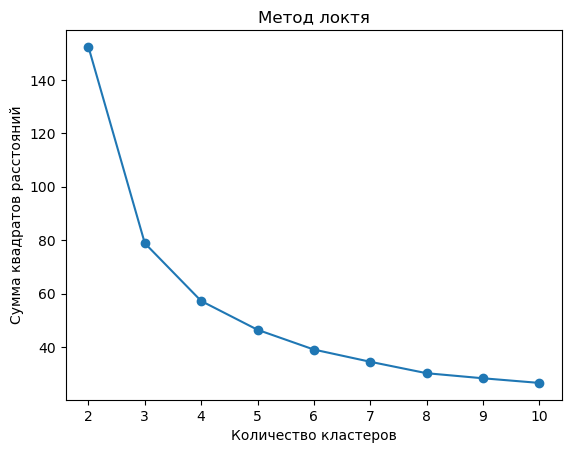

In [8]:
# список для сохранения значений инерции
inertia_values = []

# Перебираем разное количество кластеров
for k in range(2, 11):
    # объект KMeans с текущим количеством кластеров
    kmeans = KMeans( n_clusters = k, random_state = 42)
    kmeans.fit( X )
    # Сохраняем значение инерции - мерой компактности кластеров. 
    # Он вычисляется как сумма квадратов расстояний между каждым объектом данных и центроидом  
    inertia_values.append( kmeans.inertia_ )

plt.plot(range(2, 11), inertia_values, marker='o')
plt.xlabel('Количество кластеров')
plt.ylabel('Сумма квадратов расстояний')
plt.title('Метод локтя')
plt.show()

Полученный график должен показывать, при каком минимальном количестве кластеров, увеличение их количества не несет существенного вклада в уменьшение суммы квадратов расстояний. 

Достаточное количество кластеров обычно выбирается в точке излома графика. 



### Метод кластеризации DBSCAN


Метод основан на поиске групп точек на основе максимально допустимого расстояниями между точками (и минимального количества точек, которые могут формировать кластер).

Суть алгоритма заключается в обходе всех точек с просмотром всех соседей, расположенных не далее, чем заданный параметр $\epsilon$. Если при обходе не найдено больше таких блихких соседей, то выполняется переход к другой точке, с которой возможно формирование нового кластера. 

Очевидно, что, в зависимости от определенных значений расстояния $\epsilon$ , часто могут быть ситуации когда у отдельных точек не будет найдено соседей. Такие точки будут помечены как неотносящимися ни к одному клстеру (выбросы) - такова особенность метода.


### Реализация DBSCAN из библиотеки scikit-learn

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

Основные параметры конструктора класса DBSCAN:

* **eps:float, default = 0.5** - максимально допустимое расстояние $\epsilon$ между точками одного кластра. Самый важный параметр метода. На нем основано качество кластеризации.

* **min_samples: int, default=5** - минимальное количество точек-соседей для формирования кластера.

* **metric: str, or callable, default=’euclidean’** - Метрика для расчета расстояния между точками

* **algorithm: {‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’** - алгоритм поиска ближайших соседей. Используется модуль NearestNeighbors.

* **p: float, default = None** - Показатель степени в метрике Минковского (при *p* = 2 метрика сводится к Евклидовой). Если не задано (указано None) то *p*=2 (используется Евклидова метрика по умолчанию - см выше параметр metric).

* **n_jobs: int, default = None** - количество параллельных процессов для выполняния задачи. При значении -1 задействуются все ядра ЦП.

In [11]:
from sklearn.cluster import DBSCAN

# Создаем объект DBSCAN с параметрами: радиус epsilon и минимальное количество точек в окрестности min_samples
dbscan = DBSCAN(eps = .42, min_samples = 5 )

# Производим кластеризацию данных
dbscan.fit(X)

# метки кластеров для каждого объекта (-1 означает шумовые точки)
labels = dbscan.labels_

# Получаем количество кластеров (-1 означает шумовые точки)
n_clusters = len( set(labels)) - (1 if -1 in labels else 0)

# Выводим результаты
print("Метки кластеров:")
print(labels)
print("Количество кластеров:", n_clusters)
print("Средний индекс силуэта:", silhouette_score(X, labels))
print("Коэффициент Дэвиcа-Болдуина:", davies_bouldin_score(X, labels))
print("Коэффициент ARI:", adjusted_rand_score(data.target, labels))

Метки кластеров:
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  1  1  1  1  1  1  1 -1  1  1 -1  1 -1  1 -1  1  1  1 -1  1  2  1
  2  1  1  1  1  1  1 -1  1  1  1  2  1 -1  1 -1  1  1  1  1  1 -1  1  1
  1  1 -1  1 -1  2  2  2  2 -1 -1 -1 -1 -1  2  2  2  2 -1  2  2 -1 -1 -1
  2  2 -1  2  2 -1  2  2  2 -1 -1 -1  2  2 -1 -1  2  2  2  2  2  2  2  2
  2  2  2  2  2  2]
Количество кластеров: 3
Средний индекс силуэта: 0.35789153664694195
Коэффициент Дэвиcа-Болдуина: 3.0074360775896563
Коэффициент ARI: 0.6789169033321049


### Иерархическая кластеризация:

#### Агломеративная:

In [12]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np

# Создаем объект AgglomerativeClustering с количеством кластеров равным 3
agg_clustering = AgglomerativeClustering(n_clusters = 3)

# Производим кластеризацию данных
agg_clustering.fit(X)

# Получаем метки кластеров для каждого объекта
labels = agg_clustering.labels_

# Выводим результаты
print("Метки кластеров:")
print(labels)
print("Средний индекс силуэта:", silhouette_score(X, labels))
print("Коэффициент Дэвиcа-Болдуина:", davies_bouldin_score(X, labels))
print("Коэффициент ARI:", adjusted_rand_score(data.target, labels))

Метки кластеров:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
Средний индекс силуэта: 0.5543236611296419
Коэффициент Дэвиcа-Болдуина: 0.656256454064201
Коэффициент ARI: 0.7311985567707746


#### Визуализация дендрограммы:

C помощью функций **linkage** и **dendrogram** из библиотеки **scipy**

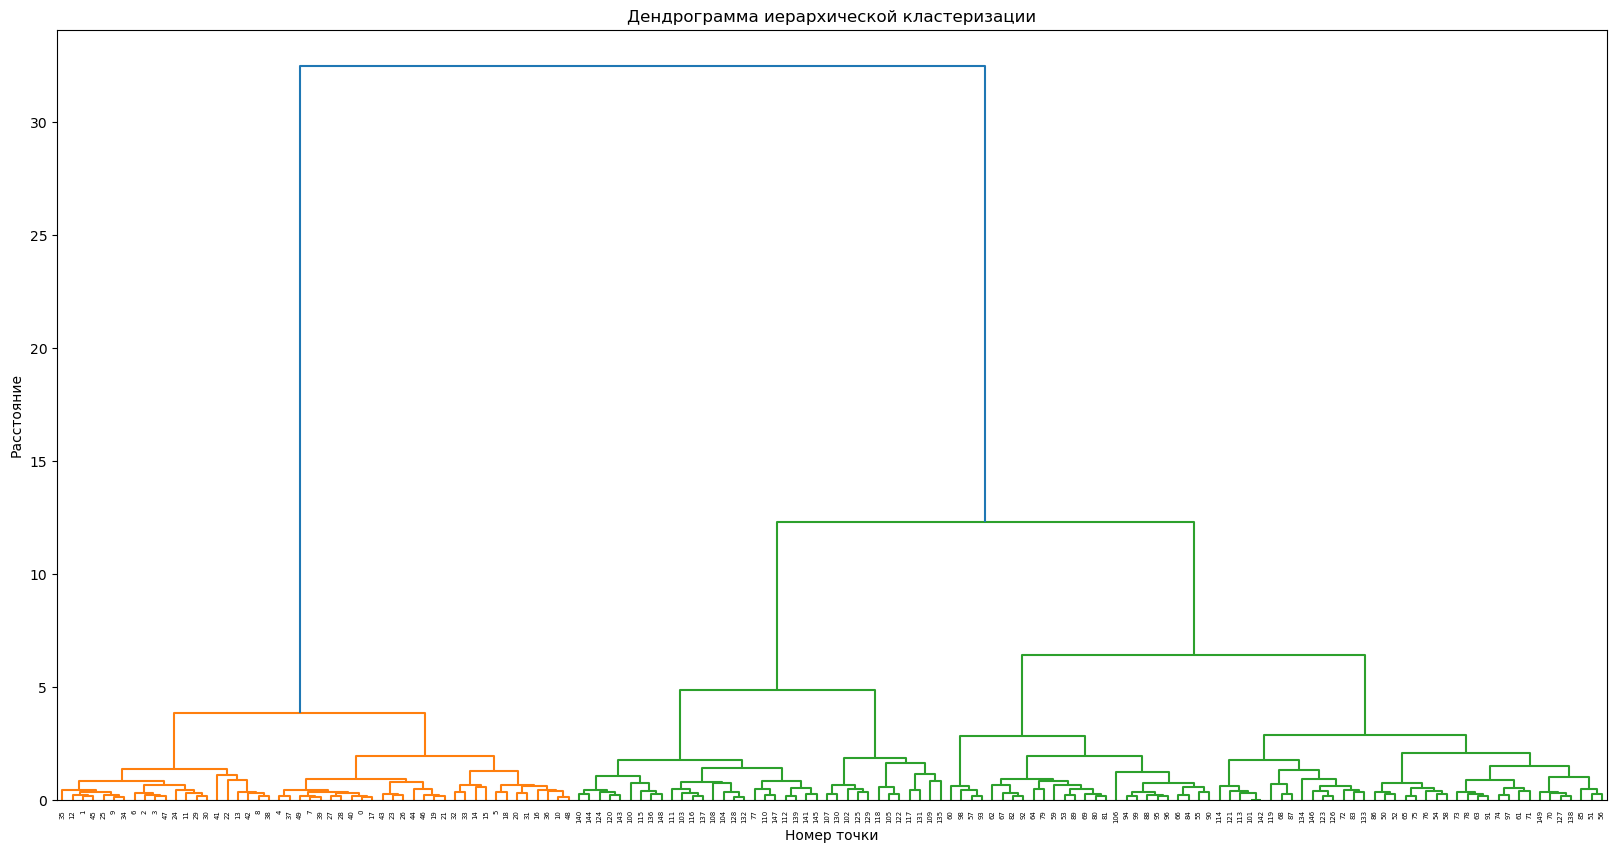

In [15]:
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy

# Выполняем иерархическую кластеризацию
Z = hierarchy.linkage(X, method = "ward")

# Визуализируем дендрограмму
plt.figure(figsize = (20, 10))
dn = hierarchy.dendrogram(Z)

# Добавляем метки кластеров к точкам на оси X
#labels = range(len(X))
#plt.xticks(range(len(X)), labels)

# Добавляем подписи осей и заголовок
plt.xlabel('Номер точки')
plt.ylabel('Расстояние')
plt.title('Дендрограмма иерархической кластеризации')

# Показываем график
plt.show()